In [10]:
import joblib
import os
import pandas as pd

In [13]:
from typing import Final

BASE_DIR = os.getcwd()


In [6]:
model = joblib.load('ml_model')

In [11]:
def pickle_loads(file_path):
    from os import path
    if os.stat(file_path).st_size <=5:
        raise Exception(f"{file_path} file data is too small, less than 5 bytes")
    
    if path.exists(file_path):
        pickled_file = open(file_path, "rb")
        obj = pd.compat.pickle_compat.load(pickled_file)
        pickled_file.close()
        return obj


In [17]:
class ModelConstants:
    MODEL_DIR: Final = os.path.join(BASE_DIR)
    MODEL_FILE: Final = "ml_model"
    X_TRAIN: Final = "x_train"
    X_TEST: Final = "x_test"
    Y_TRAIN: Final = "y_train"
    Y_TEST: Final = "y_test"
    SCORING_FUN: Final = "scoring_func"
    Reverse_Map: Final = "label_map"
    Meta_Info: Final = "meta_info"
    Requirments: Final = "requirement"

In [18]:
meta_info = pickle_loads(os.path.join(ModelConstants.MODEL_DIR, ModelConstants.Meta_Info))
x_train = pickle_loads(os.path.join(ModelConstants.MODEL_DIR, ModelConstants.X_TRAIN))
y_train = pickle_loads(os.path.join(ModelConstants.MODEL_DIR, ModelConstants.Y_TRAIN))
x_test = pickle_loads(os.path.join(ModelConstants.MODEL_DIR, ModelConstants.X_TEST))
y_test = pickle_loads(os.path.join(ModelConstants.MODEL_DIR, ModelConstants.Y_TEST))
requirements = pickle_loads(os.path.join(ModelConstants.MODEL_DIR, ModelConstants.Requirments))

In [32]:
import plotly.express as px
import matplotlib.pyplot as plt

In [43]:
probs[:,0] == probs[:,1]

array([False, False, False, ..., False, False, False])

(4486, 2)
[2.   1.   0.99 0.98 0.97 0.95 0.  ]


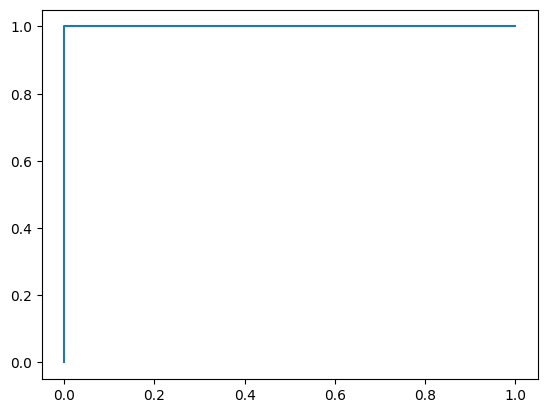

In [48]:
import sklearn.metrics as metrics
probs = model.predict_proba(x_test)
print(probs.shape)
no_classes = probs.shape[1]
for i in range(no_classes):
    if i==0:
        fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,i], pos_label=i)
        plt.plot(fpr,tpr)
        print(threshold)

[2.   1.   0.04 0.03 0.02 0.01 0.  ]


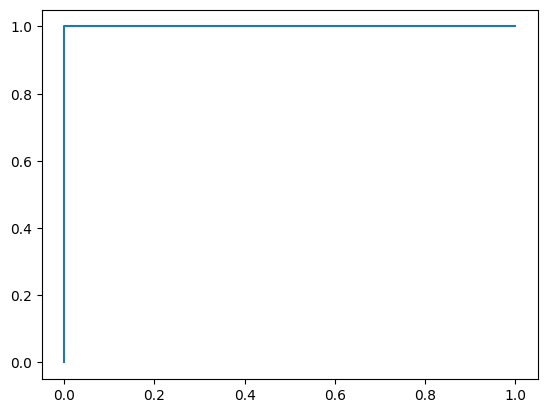

In [49]:
for i in range(no_classes):
    if i==1:
        fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,i], pos_label=i)
        plt.plot(fpr,tpr)
        print(threshold)